In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
def threat(pf):
    TP=0
    TN=0
    FP=0
    FN=0
    for index,row in pf.iterrows():
        if row['State']==row['Nature']:
            if row['State']==row['Obs']:
                TN+=1
            elif row['State']!=row['Obs']:
                TP+=1
        elif row['State']!=row['Nature']:
            if row['State']==row['Obs']:
                FN+=1
            elif row['State']!=row['Obs']:
                FP+=1
    #return [TP,FP,FN,TN]
    if TP+FP+FN==0:
        return 0
    else:
        return TP/(TP+FP+FN)

In [4]:
import statistics as st

In [5]:
thsize=pd.DataFrame(columns=['Size','Threat'])
for size in range(100,1100,100):
    th=[]
    for time in range(99):
        pf=pd.read_csv(f'./{size}/{time}_pf.csv')
        th.append(threat(pf))
    thmean=pd.Series([size,st.mean(th)],index=thsize.columns)
    thsize=thsize.append(thmean,ignore_index=True)

In [6]:
thsize

,Size,Threat
0,100.0,0.090741
1,200.0,0.095707
2,300.0,0.076599
3,400.0,0.103199
4,500.0,0.104052
5,600.0,0.094456
6,700.0,0.110269
7,800.0,0.099888
8,900.0,0.104894
9,1000.0,0.115741


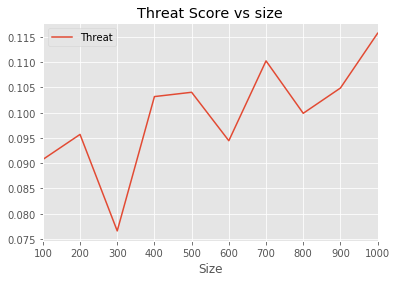

In [8]:
thsize.set_index(['Size']).plot()
plt.title('Threat Score vs size')
plt.savefig('Threat_size.png')

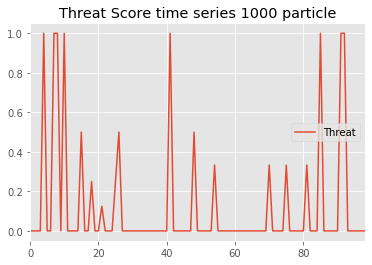

In [16]:
size=1000
th=pd.DataFrame(columns=['Threat'])
for time in range(99):
    pf=pd.read_csv(f'./{size}/{time}_pf.csv')
    th_time=pd.Series([threat(pf)],index=th.columns)
    th=th.append(th_time,ignore_index=True)
th.plot()
plt.title('Threat Score time series 1000 particle')
plt.savefig('Threat1000.png')

In [19]:
thstat=pd.DataFrame(columns=['Size'])
thstat['Size']=np.arange(100,1100,100)

In [20]:
thstat

,Size
0,100
1,200
2,300
3,400
4,500
5,600
6,700
7,800
8,900
9,1000


In [76]:
for sample in range(10):
    thsize=pd.DataFrame(columns=['Size','Threat'])
    for size in range(100,1100,100):
        th=[]
        for time in range(99):
            pf=pd.read_csv(f'./{sample}/{size}/{time}_pf.csv')
            th.append(threat(pf))
        thmean=pd.Series([size,st.mean(th)],index=thsize.columns)
        thsize=thsize.append(thmean,ignore_index=True)
    thstat[f'{sample}_Threat']=thsize['Threat']

In [77]:
thstat

,Size,0_Threat,1_Threat,2_Threat,3_Threat,4_Threat,5_Threat,6_Threat,7_Threat,8_Threat,9_Threat
0,100,0.090741,0.071645,0.080439,0.071577,0.083759,0.074656,0.087823,0.069024,0.044160,0.071212
1,200,0.095707,0.093194,0.085971,0.091835,0.088068,0.090865,0.084961,0.085871,0.075685,0.087470
2,300,0.076599,0.090404,0.099663,0.086055,0.124074,0.101684,0.096561,0.109861,0.081566,0.085450
3,400,0.103199,0.102201,0.081914,0.089502,0.108866,0.107323,0.109804,0.100433,0.094388,0.117043
4,500,0.104052,0.101347,0.095286,0.116162,0.108333,0.112458,0.116162,0.107576,0.103451,0.095314
5,600,0.094456,0.101431,0.088143,0.133373,0.091847,0.097138,0.116595,0.076455,0.104630,0.101010
6,700,0.110269,0.111869,0.101431,0.110887,0.093350,0.103872,0.125758,0.101347,0.096056,0.110366
7,800,0.099888,0.100084,0.098906,0.097403,0.105652,0.095034,0.105315,0.104798,0.111448,0.092593
8,900,0.104894,0.114394,0.102790,0.092508,0.120046,0.104714,0.087638,0.120707,0.113075,0.096336
9,1000,0.115741,0.102790,0.097403,0.107279,0.111488,0.076359,0.084007,0.100770,0.116522,0.124675


In [78]:
thstat.set_index(['Size'],inplace=True)

In [79]:
thstat['Mean_Threat']=thstat.mean(axis=1)
thstat

,0_Threat,1_Threat,2_Threat,3_Threat,4_Threat,5_Threat,6_Threat,7_Threat,8_Threat,9_Threat,Mean_Threat
Size,,,,,,,,,,,
100,0.090741,0.071645,0.080439,0.071577,0.083759,0.074656,0.087823,0.069024,0.044160,0.071212,0.074503
200,0.095707,0.093194,0.085971,0.091835,0.088068,0.090865,0.084961,0.085871,0.075685,0.087470,0.087963
300,0.076599,0.090404,0.099663,0.086055,0.124074,0.101684,0.096561,0.109861,0.081566,0.085450,0.095192
400,0.103199,0.102201,0.081914,0.089502,0.108866,0.107323,0.109804,0.100433,0.094388,0.117043,0.101467
500,0.104052,0.101347,0.095286,0.116162,0.108333,0.112458,0.116162,0.107576,0.103451,0.095314,0.106014
600,0.094456,0.101431,0.088143,0.133373,0.091847,0.097138,0.116595,0.076455,0.104630,0.101010,0.100508
700,0.110269,0.111869,0.101431,0.110887,0.093350,0.103872,0.125758,0.101347,0.096056,0.110366,0.106520
800,0.099888,0.100084,0.098906,0.097403,0.105652,0.095034,0.105315,0.104798,0.111448,0.092593,0.101112
900,0.104894,0.114394,0.102790,0.092508,0.120046,0.104714,0.087638,0.120707,0.113075,0.096336,0.105710


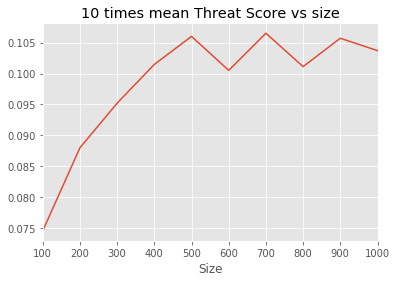

In [82]:
thstat['Mean_Threat'].plot()
plt.title('10 times mean Threat Score vs size')
plt.savefig('10_threat_size.png')

In [21]:
sample=0

In [22]:
epicurves=pd.DataFrame(columns=['Time'])
epicurves['Time']=np.arange(0,99,1)
for size in range(100,1100,100):
    epi=pd.DataFrame(columns=[0,1])
    for time in range(99):
        df=pd.read_csv(f'./{sample}/{size}/{time}_pf.csv')
        count=pd.Series(df['State'].value_counts(),index=epi.columns)
        epi=epi.append(count,ignore_index=True)
    epicurves[f'I_{size}']=epi[1]

In [23]:
epicurves

,Time,I_100,I_200,I_300,I_400,I_500,I_600,I_700,I_800,I_900,I_1000
0,0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,1,1,1,1
3,3,1,1,1,1,1,1,1,1,1,1
4,4,1,1,2,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
94,94,32,32,31,31,33,32,30,32,33,31
95,95,29,29,30,31,29,27,29,27,28,30
96,96,33,31,32,31,30,30,31,30,31,30
97,97,35,34,34,35,35,35,35,35,35,35


In [68]:
epi_curve=pd.DataFrame(columns=[0,1])
for time in range(99):
    df=pd.read_csv(f'./{sample}/{size}/{time}_pf.csv')
    count=pd.Series(df['Obs'].value_counts(),index=epi_curve.columns)
    epi_curve=epi_curve.append(count,ignore_index=True)
epicurves['Obs']=epi_curve[1]

In [69]:
epicurves

,I_100,I_200,I_300,I_400,I_500,I_600,I_700,I_800,I_900,I_1000,Nature,Obs
Time,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,2,1,1,2,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
94,32,32,31,31,33,32,30,32,33,31,32,32
95,29,29,30,31,29,27,29,27,28,30,29,29
96,33,31,32,31,30,30,31,30,31,30,31,31


In [27]:
epicurves.set_index(['Time'],inplace=True)
epicurves

,I_100,I_200,I_300,I_400,I_500,I_600,I_700,I_800,I_900,I_1000,Nature
Time,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1
4,1,1,2,1,1,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
94,32,32,31,31,33,32,30,32,33,31,32
95,29,29,30,31,29,27,29,27,28,30,29
96,33,31,32,31,30,30,31,30,31,30,31


In [63]:
rmse_size=pd.DataFrame(columns=['Size','RMSE'])
for size in range(100,1100,100):
    s=0
    for index,row in epicurves[f'I_{size}'].iteritems():
        s+=(row-epicurves['Nature'].iloc[index])**2
    s=np.sqrt(s/epicurves.index.size)
    rmse=pd.Series([size,s],index=rmse_size.columns)
    rmse_size=rmse_size.append(rmse,ignore_index=True)

In [64]:
rmse_size

,Size,RMSE
0,100.0,1.783765
1,200.0,2.294041
2,300.0,2.069500
3,400.0,1.938447
4,500.0,1.657551
5,600.0,1.775251
6,700.0,1.154701
7,800.0,1.877566
8,900.0,1.267304
9,1000.0,1.206045


In [71]:
s=0
for index,row in epicurves['Obs'].iteritems():
    s+=(row-epicurves['Nature'].iloc[index])**2
s=np.sqrt(s/epicurves.index.size)
rmse=pd.Series([size,s],index=rmse_size.columns)

In [72]:
rmse

Size    1000.000000
RMSE       0.603023
dtype: float64

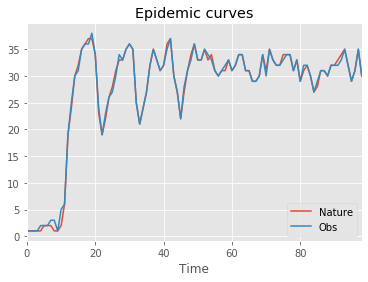

In [75]:
epicurves['Nature'].plot()
epicurves['Obs'].plot()
plt.title('Epidemic curves')
plt.legend()
plt.savefig('obsepi.png')

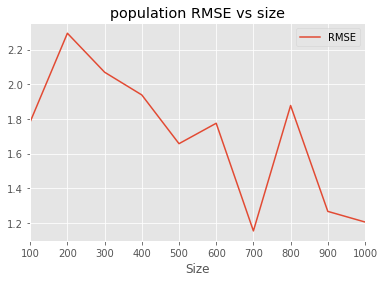

In [67]:
rmse_size.set_index(['Size']).plot()
plt.title('population RMSE vs size')
plt.savefig('pop_rmse.png')

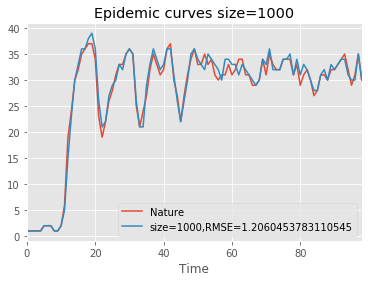

In [50]:
epicurves['Nature'].plot()
epicurves[f'I_{size}'].plot(label=f'size={size},RMSE={s}')
plt.legend()
plt.title(f'Epidemic curves size={size}')
plt.savefig('Epi_RMSE_1000.png')

In [57]:
epicurves

,I_100,I_200,I_300,I_400,I_500,I_600,I_700,I_800,I_900,I_1000,Nature
Time,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1
4,1,1,2,1,1,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
94,32,32,31,31,33,32,30,32,33,31,32
95,29,29,30,31,29,27,29,27,28,30,29
96,33,31,32,31,30,30,31,30,31,30,31


In [ ]:
import networkx as nx

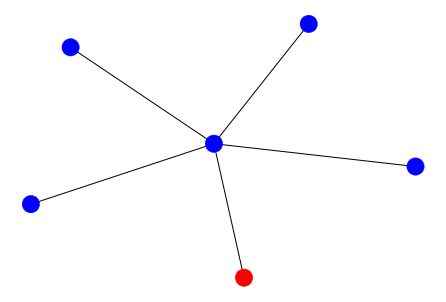

In [86]:
g=nx.star_graph(5)
nx.draw(g,node_color=['blue','blue','red','blue','blue','blue'])
plt.savefig('demo.png')

In [87]:
ba=nx.read_edgelist('ba.csv')

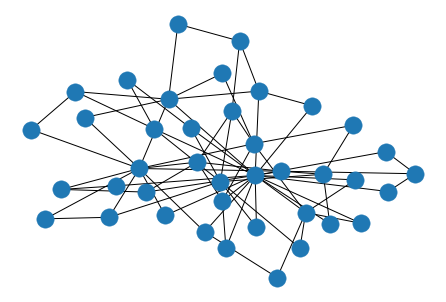

In [88]:
nx.draw(ba)

In [90]:
b=nx.betweenness_centrality(ba)

In [91]:
b

{'0': 0.0288118801276696,
 '1': 0.19476843818949083,
 '2': 0.06989160936529357,
 '5': 0.02304479146584409,
 '8': 0.03497418760576655,
 '14': 0.017224685645738275,
 '6': 0.08313036865668447,
 '9': 0.1369106527001264,
 '19': 0.005647130647130647,
 '21': 0.018572606730501467,
 '26': 0.03323586744639376,
 '32': 0.00826960563802669,
 '34': 0.011868346078872393,
 '37': 0.0,
 '39': 0.0,
 '3': 0.0062110404215667365,
 '4': 0.4991394083499346,
 '11': 0.028311162521688835,
 '23': 0.009427414690572589,
 '31': 0.009427414690572589,
 '7': 0.010647344857871173,
 '10': 0.032610907610907604,
 '12': 0.07442002442002442,
 '15': 0.0069441766810187855,
 '17': 0.05591757170704538,
 '20': 0.0,
 '24': 0.02954876507508086,
 '27': 0.0,
 '28': 0.0,
 '33': 0.0,
 '36': 0.009796928217980849,
 '16': 0.004016451384872438,
 '22': 0.003769037979564295,
 '13': 0.08005001820791292,
 '30': 0.01125141914615599,
 '18': 0.016453526979842766,
 '35': 0.003993959257117152,
 '29': 0.00487864961549172,
 '38': 0.001349527665317139

In [94]:
c=nx.closeness_centrality(ba,normalize=True)

TypeError: closeness_centrality() got an unexpected keyword argument 'normalize'

In [99]:
c

{'0': 0.41935483870967744,
 '1': 0.48148148148148145,
 '2': 0.4875,
 '5': 0.4431818181818182,
 '8': 0.4020618556701031,
 '14': 0.42391304347826086,
 '6': 0.4482758620689655,
 '9': 0.4936708860759494,
 '19': 0.34513274336283184,
 '21': 0.38235294117647056,
 '26': 0.45348837209302323,
 '32': 0.4431818181818182,
 '34': 0.3786407766990291,
 '37': 0.3482142857142857,
 '39': 0.38613861386138615,
 '3': 0.34210526315789475,
 '4': 0.609375,
 '11': 0.39,
 '23': 0.39,
 '31': 0.39,
 '7': 0.4105263157894737,
 '10': 0.4431818181818182,
 '12': 0.4642857142857143,
 '15': 0.42391304347826086,
 '17': 0.45348837209302323,
 '20': 0.40625,
 '24': 0.43333333333333335,
 '27': 0.3939393939393939,
 '28': 0.4020618556701031,
 '33': 0.40625,
 '36': 0.40625,
 '16': 0.34210526315789475,
 '22': 0.37142857142857144,
 '13': 0.42857142857142855,
 '30': 0.35135135135135137,
 '18': 0.36792452830188677,
 '35': 0.3482142857142857,
 '29': 0.3644859813084112,
 '38': 0.34513274336283184,
 '25': 0.319672131147541}

In [108]:
cc=pd.DataFrame.from_dict(c,orient='index')
cc

,0
0,0.419355
1,0.481481
2,0.487500
5,0.443182
8,0.402062
14,0.423913
6,0.448276
9,0.493671
19,0.345133
21,0.382353


In [111]:
cc.to_csv('cc.csv',sep=" ",header=False)

In [95]:
!ls

100                Epi_RMSE_1000.png  Threat_size.png    nature.csv
10_threat_size.png Presen.ipynb       ba.csv             obs.csv
200                Threat100.png      demo.png           obsepi.png
Epi_RMSE_100.png   Threat1000.png     dir.sh             pop_rmse.png


### observation dependency

### consider centrality

#### closeness cent

In [114]:
err=100
time=10
pf=pd.read_csv(f'./{err}/{time}_pf.csv')
pf

,ID,S,I,State,Nature,Obs
0,0,436,64,0,0,1
1,1,497,3,0,0,0
2,2,481,19,0,0,0
3,3,498,2,0,0,0
4,4,489,11,0,0,0
5,5,490,10,0,0,0
6,6,453,47,0,0,0
7,7,496,4,0,0,0
8,8,68,432,1,1,0
9,9,480,20,0,0,0


In [122]:
err=100
th=pd.DataFrame(columns=['Time','Threat'])
for time in range(99):
    pf=pd.read_csv(f'./{err}/{time}_cpf.csv')
    th_t=pd.Series([time,threat(pf)],index=th.columns)
    th=th.append(th_t,ignore_index=True)
th

,Time,Threat
0,0.0,0.000000
1,1.0,0.666667
2,2.0,0.666667
3,3.0,0.666667
4,4.0,0.833333
...,...,...
94,94.0,0.600000
95,95.0,0.230769
96,96.0,0.000000
97,97.0,0.125000


Time      49.000000
Threat     0.375037
dtype: float64

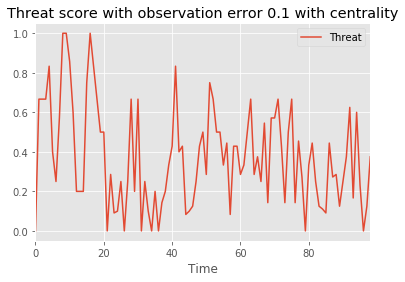

In [129]:
th.set_index(['Time']).plot()
plt.title(f'Threat score with observation error {err/1000} with centrality')
plt.savefig('Threat_cent.png')
th.mean()

In [127]:
err=100
th_u=pd.DataFrame(columns=['Time','threat'])
for time in range(99):
    pf=pd.read_csv(f'./{err}/{time}_usualpf.csv')
    th_u_t=pd.Series([time,threat(pf)],index=th_u.columns)
    th_u=th_u.append(th_u_t,ignore_index=True)
th_u

,Time,threat
0,0.0,1.000000
1,1.0,1.000000
2,2.0,1.000000
3,3.0,0.666667
4,4.0,0.428571
...,...,...
94,94.0,0.500000
95,95.0,0.285714
96,96.0,0.000000
97,97.0,0.285714


Time      49.000000
threat     0.390304
dtype: float64

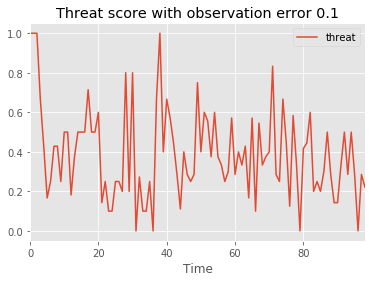

In [130]:
th_u.set_index(['Time']).plot()
plt.title(f'Threat score with observation error {err/1000}')
plt.savefig('Threat.png')
th_u.mean()

In [131]:
e=nx.eigenvector_centrality(ba)

In [132]:
ee=pd.DataFrame.from_dict(e,orient='index')


In [133]:
ee

,0
0,0.145254
1,0.234439
2,0.199513
5,0.177867
8,0.079389
14,0.145481
6,0.137322
9,0.222165
19,0.053457
21,0.071091


In [134]:
ee.to_csv('ee.csv',header=False,sep=" ")

In [137]:
err=100
th_e=pd.DataFrame(columns=['Time','threat'])
for time in range(99):
    pf=pd.read_csv(f'./{err}/{time}_epf.csv')
    th_e_t=pd.Series([time,threat(pf)],index=th_e.columns)
    th_e=th_e.append(th_e_t,ignore_index=True)
th_e

,Time,threat
0,0.0,0.500000
1,1.0,0.800000
2,2.0,0.800000
3,3.0,0.750000
4,4.0,0.857143
...,...,...
94,94.0,0.416667
95,95.0,0.294118
96,96.0,0.000000
97,97.0,0.333333


Time      49.000000
threat     0.266187
dtype: float64

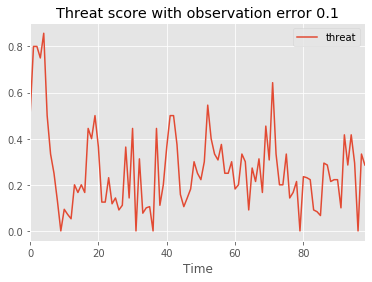

In [157]:
th_e.set_index(['Time']).plot()
plt.title(f'Threat score with observation error {err/1000}')
plt.savefig('Threate.png')
th_e.mean()

In [140]:
bb=pd.DataFrame.from_dict(b,orient='index')
bb

,0
0,0.028812
1,0.194768
2,0.069892
5,0.023045
8,0.034974
14,0.017225
6,0.083130
9,0.136911
19,0.005647
21,0.018573


In [141]:
bb.to_csv('bb.csv',header=False,sep=" ")

Time      49.000000
threat     0.208649
dtype: float64

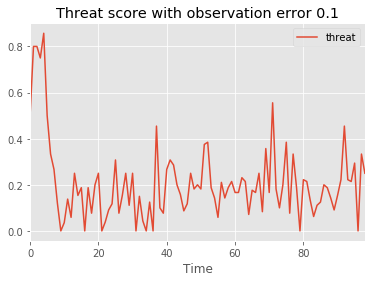

In [158]:
err=100
th_b=pd.DataFrame(columns=['Time','threat'])
for time in range(99):
    pf=pd.read_csv(f'./{err}/{time}_bpf.csv')
    th_b_t=pd.Series([time,threat(pf)],index=th_b.columns)
    th_b=th_b.append(th_b_t,ignore_index=True)
th_b

th_b.set_index(['Time']).plot()
plt.title(f'Threat score with observation error {err/1000}')
plt.savefig('Threatb.png')
th_b.mean()

In [144]:
d=nx.degree_centrality(ba)
dd=pd.DataFrame.from_dict(d,orient='index')
dd.to_csv('dd.csv',header=False,sep=" ")

Time      49.000000
threat     0.314163
dtype: float64

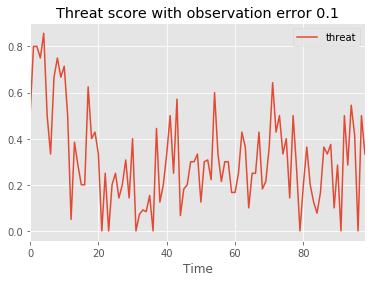

In [160]:
err=100
th_d=pd.DataFrame(columns=['Time','threat'])
for time in range(99):
    pf=pd.read_csv(f'./{err}/{time}_dpf.csv')
    th_d_t=pd.Series([time,threat(pf)],index=th_d.columns)
    th_d=th_d.append(th_d_t,ignore_index=True)
th_d

th_d.set_index(['Time']).plot()
plt.title(f'Threat score with observation error {err/1000}')
plt.savefig('Threatd.png')
th_d.mean()

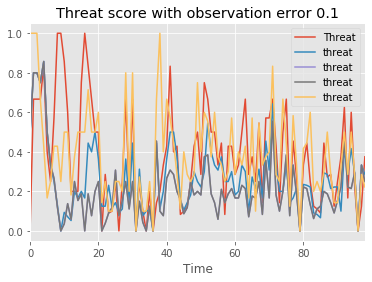

In [156]:
ax=th.set_index(['Time']).plot(label='closeness',legend=False)
th_e.set_index(['Time']).plot(ax=ax,label='eigen',legend=False)
th_b.set_index(['Time']).plot(ax=ax,label='between',legend=False)
th_d.set_index(['Time']).plot(ax=ax,label='degree',legend=False)
th_u.set_index(['Time']).plot(ax=ax,label='usual',legend=False)
plt.title(f'Threat score with observation error {err/1000}')
plt.savefig('Summary.png')
plt.legend()

In [ ]:
err=100
th_e=pd.DataFrame(columns=['Time','threat'])
for time in range(99):
    pf=pd.read_csv(f'./{err}/{time}_epf.csv')
    th_e_t=pd.Series([time,threat(pf)],index=th_e.columns)
    th_e=th_e.append(th_e_t,ignore_index=True)
th_e

In [161]:
err=100
epicurves=pd.DataFrame(columns=['Time'])
epicurves['Time']=np.arange(0,99,1)
for cents in 'bcde':
    epi=pd.DataFrame(columns=[0,1])
    for time in range(99):
        df=pd.read_csv(f'./{err}/{time}_{cents}pf.csv')
        count=pd.Series(df['State'].value_counts(),index=epi.columns)
        epi=epi.append(count,ignore_index=True)
    epicurves[f'I_{cents}']=epi[1]

In [162]:
epicurves

,Time,I_b,I_c,I_d,I_e
0,0,NaN,NaN,NaN,NaN
1,1,NaN,1.0,NaN,NaN
2,2,NaN,1.0,NaN,NaN
3,3,NaN,2.0,NaN,NaN
4,4,NaN,1.0,NaN,NaN
...,...,...,...,...,...
94,94,31.0,29.0,33.0,37.0
95,95,33.0,27.0,32.0,39.0
96,96,34.0,32.0,34.0,40.0
97,97,33.0,35.0,34.0,39.0


In [163]:
epicurves.fillna(0,inplace=True)

In [164]:
epicurves

,Time,I_b,I_c,I_d,I_e
0,0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0
2,2,0.0,1.0,0.0,0.0
3,3,0.0,2.0,0.0,0.0
4,4,0.0,1.0,0.0,0.0
...,...,...,...,...,...
94,94,31.0,29.0,33.0,37.0
95,95,33.0,27.0,32.0,39.0
96,96,34.0,32.0,34.0,40.0
97,97,33.0,35.0,34.0,39.0


In [165]:
epi_curve=pd.DataFrame(columns=[0,1])
for time in range(99):
    df=pd.read_csv(f'./{err}/{time}_{cents}pf.csv')
    count=pd.Series(df['Obs'].value_counts(),index=epi_curve.columns)
    epi_curve=epi_curve.append(count,ignore_index=True)
epicurves['Obs']=epi_curve[1]

In [166]:
epi_curve=pd.DataFrame(columns=[0,1])
for time in range(99):
    df=pd.read_csv(f'./{err}/{time}_{cents}pf.csv')
    count=pd.Series(df['Nature'].value_counts(),index=epi_curve.columns)
    epi_curve=epi_curve.append(count,ignore_index=True)
epicurves['Nature']=epi_curve[1]

In [167]:
epicurves

,Time,I_b,I_c,I_d,I_e,Obs,Nature
0,0,0.0,0.0,0.0,0.0,2,1
1,1,0.0,1.0,0.0,0.0,5,1
2,2,0.0,1.0,0.0,0.0,5,1
3,3,0.0,2.0,0.0,0.0,4,1
4,4,0.0,1.0,0.0,0.0,7,1
...,...,...,...,...,...,...,...
94,94,31.0,29.0,33.0,37.0,27,32
95,95,33.0,27.0,32.0,39.0,24,29
96,96,34.0,32.0,34.0,40.0,31,31
97,97,33.0,35.0,34.0,39.0,32,35


In [168]:
epicurves.set_index(['Time'],inplace=True)

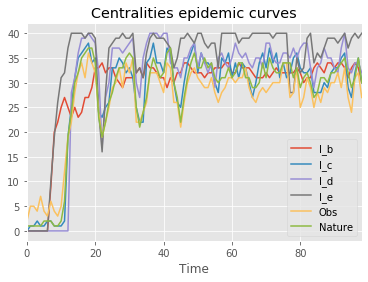

In [170]:
epicurves.plot()
plt.title('Centralities epidemic curves')
plt.savefig('centRMSE.png')

In [187]:
rmse_cent=pd.DataFrame(columns=['cent','RMSE'])
for cent in 'bcde':
    s=0
    for index,row in epicurves[f'I_{cent}'].iteritems():
        s+=(row-epicurves['Nature'].iloc[index])**2
    s=np.sqrt(s/epicurves.index.size)
    rmse=pd.Series([cent,s],index=rmse_cent.columns)
    rmse_cent=rmse_cent.append(rmse,ignore_index=True)

In [188]:
rmse_cent

,cent,RMSE
0,b,6.169328
1,c,2.183501
2,d,4.819992
3,e,8.639819


In [189]:
s=0
for index,row in epicurves['Obs'].iteritems():
    s+=(row-epicurves['Nature'].iloc[index])**2
s=np.sqrt(s/epicurves.index.size)
rmse=pd.Series(['obs',s],index=rmse_cent.columns)
rmse_cent=rmse_cent.append(rmse,ignore_index=True)

In [190]:
rmse_cent

,cent,RMSE
0,b,6.169328
1,c,2.183501
2,d,4.819992
3,e,8.639819
4,obs,2.874478


In [192]:
epi_curve=pd.DataFrame(columns=[0,1])
for time in range(99):
    df=pd.read_csv(f'./{err}/{time}_pf.csv')
    count=pd.Series(df['State'].value_counts(),index=epi_curve.columns)
    epi_curve=epi_curve.append(count,ignore_index=True)
epicurves['I_usual']=epi_curve[1]

In [193]:
epicurves

,I_b,I_c,I_d,I_e,Obs,Nature,I_usual
Time,,,,,,,
0,0.0,0.0,0.0,0.0,2,1,1
1,0.0,1.0,0.0,0.0,5,1,1
2,0.0,1.0,0.0,0.0,5,1,1
3,0.0,2.0,0.0,0.0,4,1,2
4,0.0,1.0,0.0,0.0,7,1,2
...,...,...,...,...,...,...,...
94,31.0,29.0,33.0,37.0,27,32,30
95,33.0,27.0,32.0,39.0,24,29,31
96,34.0,32.0,34.0,40.0,31,31,33


In [194]:
s=0
for index,row in epicurves['I_usual'].iteritems():
    s+=(row-epicurves['Nature'].iloc[index])**2
s=np.sqrt(s/epicurves.index.size)
rmse=pd.Series(['usual',s],index=rmse_cent.columns)
rmse_cent=rmse_cent.append(rmse,ignore_index=True)

In [195]:
rmse_cent

,cent,RMSE
0,b,6.169328
1,c,2.183501
2,d,4.819992
3,e,8.639819
4,obs,2.874478
5,usual,2.490386


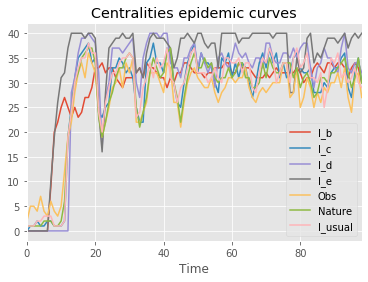

In [196]:
epicurves.plot()
plt.title('Centralities epidemic curves')
plt.savefig('centRMSE.png')

In [197]:
nx.average_shortest_path_length(ba)

2.4871794871794872

In [198]:
nx.degree_histogram(ba)

[0, 0, 18, 8, 6, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [199]:
nx.average_clustering(ba)

0.1836422495633022

In [200]:
nx.average_degree_connectivity(ba)

{5: 7.1,
 11: 3.6363636363636362,
 4: 7.0,
 3: 6.708333333333333,
 6: 5.333333333333333,
 7: 4.785714285714286,
 2: 9.555555555555555,
 21: 3.9047619047619047}

In [201]:
b

{'0': 0.0288118801276696,
 '1': 0.19476843818949083,
 '2': 0.06989160936529357,
 '5': 0.02304479146584409,
 '8': 0.03497418760576655,
 '14': 0.017224685645738275,
 '6': 0.08313036865668447,
 '9': 0.1369106527001264,
 '19': 0.005647130647130647,
 '21': 0.018572606730501467,
 '26': 0.03323586744639376,
 '32': 0.00826960563802669,
 '34': 0.011868346078872393,
 '37': 0.0,
 '39': 0.0,
 '3': 0.0062110404215667365,
 '4': 0.4991394083499346,
 '11': 0.028311162521688835,
 '23': 0.009427414690572589,
 '31': 0.009427414690572589,
 '7': 0.010647344857871173,
 '10': 0.032610907610907604,
 '12': 0.07442002442002442,
 '15': 0.0069441766810187855,
 '17': 0.05591757170704538,
 '20': 0.0,
 '24': 0.02954876507508086,
 '27': 0.0,
 '28': 0.0,
 '33': 0.0,
 '36': 0.009796928217980849,
 '16': 0.004016451384872438,
 '22': 0.003769037979564295,
 '13': 0.08005001820791292,
 '30': 0.01125141914615599,
 '18': 0.016453526979842766,
 '35': 0.003993959257117152,
 '29': 0.00487864961549172,
 '38': 0.001349527665317139

In [202]:
bb

,0
0,0.028812
1,0.194768
2,0.069892
5,0.023045
8,0.034974
14,0.017225
6,0.083130
9,0.136911
19,0.005647
21,0.018573


In [207]:
bb[0].value_counts(bins=0.05)

ValueError: `bins` should be a positive integer.